### Imports

In [1]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
import sys
import sklearn
import seaborn as sns

### Download data

In [2]:
def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))
housing = load_housing_data()

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
print(f"dimensions:{housing.shape}")
print(f"columns: {housing.columns.values}")

dimensions:(20640, 10)
columns: ['longitude' 'latitude' 'housing_median_age' 'total_rooms'
 'total_bedrooms' 'population' 'households' 'median_income'
 'median_house_value' 'ocean_proximity']


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


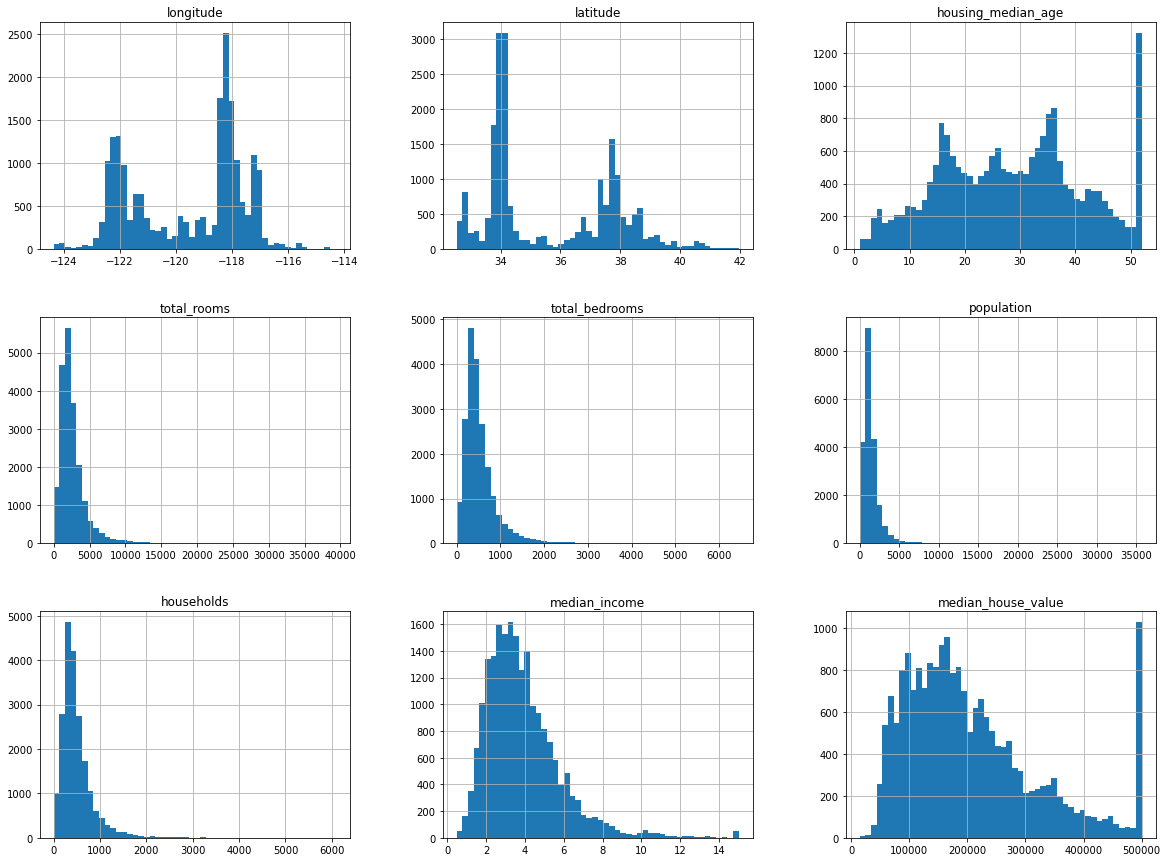

In [8]:
from matplotlib import pyplot as plt

housing.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
from statistics import mode
import numpy as np
print("Central Measures for median_income")
print("mean: {:.2f} median: {:.2f} mode {:.2f}"
      .format(housing['median_income'].mean(),
              housing['median_income'].median(),
             mode(housing['median_income'].values)))

Central Measures for median_income
mean: 3.87 median: 3.53 mode 3.12


### Split


In [10]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

* Stratified split

In [11]:
housing['income_cat'] = np.ceil(housing["median_income"]/1.5)
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace=True) # replace when cond is false
housing['income_cat'].value_counts()


3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

(1.0, 5.0)

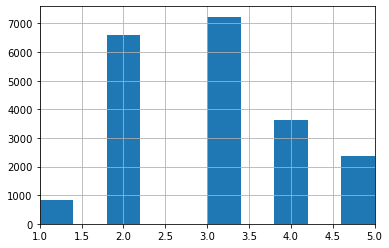

In [12]:
housing['income_cat'].hist()
plt.xlim([1,5])

In [13]:
housing['income_cat'].value_counts()/len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [14]:
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
        strat_train_set = housing.loc[train_index]
        strat_test_set = housing.loc[test_index]
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114341
1.0    0.039971
Name: income_cat, dtype: float64

In [15]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [16]:
def compare_strat(column,original, **datasets):
    result= dict.fromkeys(datasets)
    result['original'] = original[column].value_counts()/len(original)
    result =  pd.DataFrame.from_dict(result)
    for key in datasets.keys():
        result[key] = (datasets[key][column].value_counts()/len(datasets[key]))
        result['{} %error'.format(key)] = 100*(result[key]-result['original'])/result['original']
    print(result)

compare_strat(column='income_cat',original=housing, strat=strat_test_set,random=test_set)


        strat    random  original  strat %error  random %error
3.0  0.350533  0.345203  0.350581     -0.013820      -1.533997
2.0  0.318798  0.307413  0.318847     -0.015195      -3.586081
4.0  0.176357  0.184109  0.176308      0.027480       4.424292
5.0  0.114341  0.120882  0.114438     -0.084674       5.630821
1.0  0.039971  0.042393  0.039826      0.364964       6.447689


* drop stratified variable

In [17]:
for set_ in (strat_test_set,strat_train_set):
    set_.drop(columns=['income_cat'],inplace=True)
    print(set_.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


### Correlations

<AxesSubplot:>

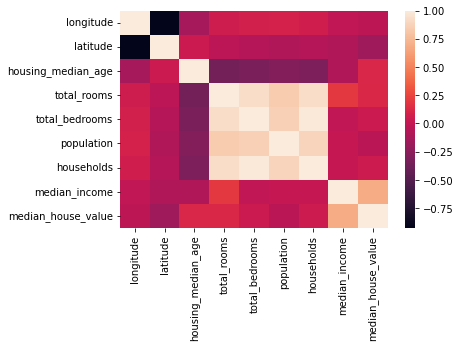

In [18]:
sns.heatmap(strat_test_set.corr())

In [19]:
corr_matrix = strat_test_set.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687091
total_rooms           0.121070
housing_median_age    0.118976
households            0.043549
total_bedrooms        0.029600
longitude            -0.026768
population           -0.040286
latitude             -0.162087
Name: median_house_value, dtype: float64

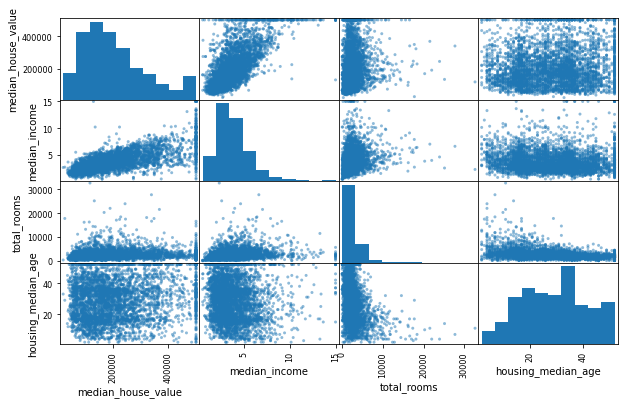

In [20]:
from pandas.plotting import scatter_matrix
features = ['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(strat_test_set[features], figsize=(10,6))
plt.show()

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

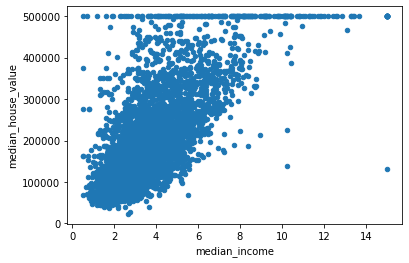

In [21]:
strat_test_set.plot(kind='scatter', y='median_house_value', x='median_income')

In [22]:
housing = strat_train_set.copy()
housing["room_per_household"] = housing['total_rooms']/housing['households']
housing['bedroom_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [23]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688380
room_per_household          0.143663
total_rooms                 0.137455
housing_median_age          0.102175
households                  0.071426
total_bedrooms              0.054635
population                 -0.020153
population_per_household   -0.038224
longitude                  -0.050859
latitude                   -0.139584
bedroom_per_room           -0.256397
Name: median_house_value, dtype: float64

### Cleaning 

In [24]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [25]:
housing_labels

13096    458300.0
14973    483800.0
3785     101700.0
14689     96100.0
20507    361800.0
           ...   
14207    500001.0
13105     88800.0
19301    148800.0
19121    500001.0
19888    233300.0
Name: median_house_value, Length: 16512, dtype: float64

### imputing the median

In [26]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

## removing categorical variable from data
housing_num = housing.drop('ocean_proximity', axis=1)
imputer.fit(housing_num)
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

### Categorical feature


In [27]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# pandas factorize
housing_cat = housing['ocean_proximity']
cat_encoded, categories = pd.factorize(housing_cat)
cat_encoded[:10]

array([0, 1, 2, 2, 3, 2, 1, 0, 1, 1], dtype=int64)

In [28]:
categories

Index(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'], dtype='object')

In [29]:
housing_cat = housing[['ocean_proximity']]
ord_enc = OrdinalEncoder()
cat_encoded = ord_enc.fit_transform(housing_cat)
cat_encoded

array([[3.],
       [0.],
       [1.],
       ...,
       [4.],
       [0.],
       [4.]])

In [30]:
oh_enc = OneHotEncoder()
oh_enc.fit(housing_cat)
data_encoded = oh_enc.transform(housing_cat)
data_encoded.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

#### Custom Transformer


In [31]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, popupation_ix, househoulds_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_rooms=True):
        self.add_bedrooms_per_rooms = add_bedrooms_per_rooms
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_households = X[:, rooms_ix]/X[:, househoulds_ix]
        population_per_households = X[:, popupation_ix]/X[:, househoulds_ix]
        if self.add_bedrooms_per_rooms:
            bedrooms_per_rooms = X[:, bedrooms_ix]/X[:, househoulds_ix]
            return np.c_[X, rooms_per_households,population_per_households,
                         bedrooms_per_rooms]
        else:
             return np.c_[X, rooms_per_households,population_per_households]

att_adder = CombinedAttributesAdder(add_bedrooms_per_rooms=False)
housing_att_added = att_adder.transform(housing.values)
housing_att_added

array([[-122.42, 37.8, 52.0, ..., 'NEAR BAY', 3.211798839458414,
        1.5241779497098646],
       [-118.38, 34.14, 40.0, ..., '<1H OCEAN', 5.504201680672269,
        1.865546218487395],
       [-121.98, 38.36, 33.0, ..., 'INLAND', 5.334975369458128,
        2.768472906403941],
       ...,
       [-117.06, 32.59, 13.0, ..., 'NEAR OCEAN', 5.157894736842105,
        3.7026315789473685],
       [-118.4, 34.06, 37.0, ..., '<1H OCEAN', 4.511933174224343,
        2.058472553699284],
       [-122.41, 37.66, 44.0, ..., 'NEAR OCEAN', 2.0330188679245285,
        3.2169811320754715]], dtype=object)

In [32]:
pd.DataFrame(housing_att_added,columns=[*housing.columns,'rooms_per_households',
                            'population_per_households'])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_households,population_per_households
0,-122.42,37.8,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,NEAR BAY,3.211799,1.524178
1,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,<1H OCEAN,5.504202,1.865546
2,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.433,INLAND,5.334975,2.768473
3,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,INLAND,5.351282,2.365385
4,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,NEAR OCEAN,3.725256,1.631399
...,...,...,...,...,...,...,...,...,...,...,...
16507,-118.4,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,<1H OCEAN,4.277247,1.793499
16508,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,INLAND,5.535714,2.667293
16509,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,NEAR OCEAN,5.157895,3.702632
16510,-118.4,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,<1H OCEAN,4.511933,2.058473


In [33]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
MinMaxScaler().fit_transform(data)

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [34]:
StandardScaler().fit_transform(data)

array([[-1.18321596, -1.18321596],
       [-0.50709255, -0.50709255],
       [ 0.16903085,  0.16903085],
       [ 1.52127766,  1.52127766]])

In [35]:
data = [[-1, 2], [-0.5, 6], [0, 10], [10, 100]]
MinMaxScaler().fit_transform(data)

array([[0.        , 0.        ],
       [0.04545455, 0.04081633],
       [0.09090909, 0.08163265],
       [1.        , 1.        ]])

In [36]:
StandardScaler().fit_transform(data)

array([[-0.68525306, -0.67399734],
       [-0.57561257, -0.57596136],
       [-0.46597208, -0.47792539],
       [ 1.7268377 ,  1.72788409]])

### Transformation Pipelines 

In [37]:
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.compose import ColumnTransformer
housing = strat_train_set.drop("median_house_value", axis=1)
num_col = housing.select_dtypes(include=np.number).columns.tolist()

cat_col = housing.select_dtypes(include='object').columns.tolist()

#num_col = housing_num.columns.to_list()
#cat_col = ['ocean_proximity']

In [38]:
num_col

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [39]:
#num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')),
 #                       ('scaller', StandardScaler())])
#cat_pipeline = Pipeline([('imputer',SimpleImputer(strategy='most_frequent')),
 #                        ('encoder', OneHotEncoder())])

In [40]:
num_pipeline = make_pipeline(SimpleImputer(strategy='median'),
                        StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'),
                         OneHotEncoder())

In [41]:
preprocessing = ColumnTransformer([("num", num_pipeline,num_col),
                                  ("cat",cat_pipeline,cat_col)])

housing_prepared = preprocessing.fit_transform(housing)

In [42]:
pd.DataFrame(housing_prepared,
             index=housing.index)

,0,1,2,3,4,5,6,7,8,9,10,11,12
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491,0.0,0.0,0.0,1.0,0.0
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942,1.0,0.0,0.0,0.0,0.0
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789,0.0,1.0,0.0,0.0,0.0
14689,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281,0.0,1.0,0.0,0.0,0.0
20507,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14207,0.586397,-0.833359,0.987087,-0.184147,0.140152,-0.445315,0.060101,0.444041,1.0,0.0,0.0,0.0,0.0
13105,0.131525,0.319822,-0.443146,0.139847,0.128298,-0.005950,0.083608,-0.685630,0.0,1.0,0.0,0.0,0.0
19301,1.256209,-1.428701,-1.237721,0.586026,0.562134,1.268299,0.679135,0.101049,0.0,0.0,0.0,0.0,1.0
19121,0.586397,-0.739605,0.669257,0.522417,0.794461,0.273563,0.882868,0.145396,1.0,0.0,0.0,0.0,0.0


In [43]:

cat_encod_col= preprocessing.named_transformers_['cat'][1].get_feature_names_out()

In [44]:
housing_prepared = pd.DataFrame(housing_prepared,columns=[*num_col,*cat_encod_col],
             index=housing.index).rename(columns=str.lower)

In [45]:
housing_prepared.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,x0_<1h ocean,x0_inland,x0_island,x0_near bay,x0_near ocean
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491,0.0,0.0,0.0,1.0,0.0
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942,1.0,0.0,0.0,0.0,0.0
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789,0.0,1.0,0.0,0.0,0.0
14689,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281,0.0,1.0,0.0,0.0,0.0
20507,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365,0.0,0.0,0.0,0.0,1.0
1286,-0.868193,1.088610,1.861119,-0.370856,-0.561571,-0.668194,-0.472739,-0.276883,0.0,1.0,0.0,0.0,0.0
18078,0.606392,-0.838047,0.430885,-0.710868,-0.808122,-0.837181,-0.893265,1.185526,1.0,0.0,0.0,0.0,0.0
4396,-1.278077,0.830784,0.589800,0.982782,0.858470,0.560383,1.018690,0.811824,0.0,0.0,0.0,1.0,0.0
18031,0.566403,-0.622412,-0.522604,0.248303,0.673556,1.128543,0.642568,-0.593710,1.0,0.0,0.0,0.0,0.0
6753,0.721359,-0.739605,-0.919891,-0.423482,0.080885,0.150248,0.177639,-1.418129,1.0,0.0,0.0,0.0,0.0


In [46]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)
some_data = housing.iloc[:10]
some_labels = housing_labels.iloc[:10]
some_prepared_data = preprocessing.transform(some_data)
some_prepared_data = pd.DataFrame(some_prepared_data,columns=[*num_col,*cat_encod_col],
             index=some_data.index).rename(columns=str.lower)


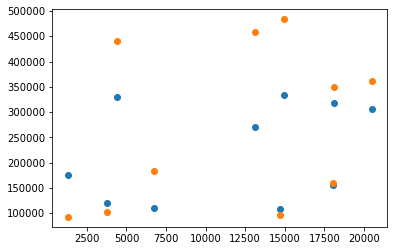

In [47]:
pred_lin = lin_reg.predict(some_prepared_data)
x = range(len(some_data))
plt.scatter(some_data.index, pred_lin)
plt.scatter(some_data.index,some_labels)

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error



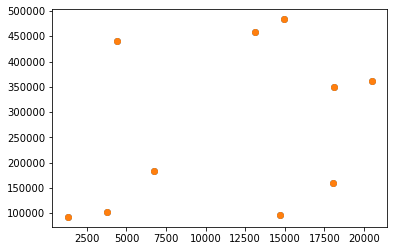

In [49]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)
pred_tree = tree_reg.predict(some_prepared_data)
x = range(len(some_data))
plt.scatter(some_data.index, pred_tree)
plt.scatter(some_data.index,some_labels)

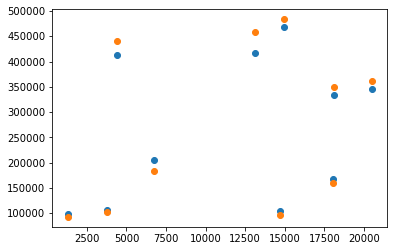

In [50]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(housing_prepared,housing_labels)
pred_rf = rf_reg.predict(some_prepared_data)
x = range(len(some_data))
plt.scatter(some_data.index, pred_rf)
plt.scatter(some_data.index,some_labels)

  ### Cross Validation
    

In [51]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg,housing_prepared,housing_labels, scoring="neg_mean_squared_error",cv=10)
mean_squared_error(some_labels,pred_tree, squared=False)

0.0

In [52]:
scores_lin = cross_val_score(lin_reg,housing_prepared,housing_labels, scoring="neg_mean_squared_error",cv=10)
mean_squared_error(some_labels,pred_lin,squared=False)

93067.60845497239

In [53]:
scores_rf = cross_val_score(rf_reg,housing_prepared,housing_labels, scoring="neg_mean_squared_error",cv=10)
mean_squared_error(some_labels,pred_rf,squared=False)

19487.245017433324

In [54]:
def display_scores(scores):
    print("Scores: ",scores)
    print("Mean: ", scores.mean())
    print("Std Deviation: ", scores.std())
print("Tree Regressor")
display_scores(np.sqrt(-scores))
print("\nLinear Regressor")
display_scores(np.sqrt(-scores_lin))
print("\nRandom Forest Regressor")
display_scores(np.sqrt(-scores_rf))

Tree Regressor
Scores:  [68074.24429254 67092.21659424 67157.77409564 69924.26682327
 68540.83579307 69128.38113197 71691.77331659 68785.94512546
 66581.1165157  67552.52110476]
Mean:  68452.90747932525
Std Deviation:  1456.5916846763162

Linear Regressor
Scores:  [69823.93458835 67748.84358734 67256.04927007 69050.18214272
 67334.60772112 68688.9649581  67424.75877757 69952.42288885
 67537.81218643 68344.1931601 ]
Mean:  68316.17692806528
Std Deviation:  971.5373052470941

Random Forest Regressor
Scores:  [48208.90904671 49699.05375478 47298.00411528 49787.1785874
 48698.74373366 49211.01846712 48516.34530518 49542.77508685
 48965.81179881 48978.92914512]
Mean:  48890.67690409151
Std Deviation:  719.5032577909165


### Hyperparameter Tunning

In [55]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'n_estimators':[3,10,30], 'max_features':[2,4,6,8]},
             {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]}]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [56]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [57]:
np.sqrt(-grid_search.best_score_)

49434.22017658633

In [58]:
grid_search.cv_results_

{'mean_fit_time': array([0.07431231, 0.27256622, 0.65971813, 0.09411244, 0.35780349,
        1.3388236 , 0.17877245, 0.60800328, 2.40321808, 0.19278922,
        0.65445738, 2.02141066, 0.11751475, 0.3016418 , 0.12931142,
        0.42284007, 0.14209466, 0.46339059]),
 'std_fit_time': array([0.00791847, 0.0358695 , 0.06503915, 0.00271385, 0.05098038,
        0.19750748, 0.01464072, 0.02665034, 0.40651397, 0.03169626,
        0.06900691, 0.36452693, 0.00771627, 0.01443365, 0.00784023,
        0.0294653 , 0.00696672, 0.0053845 ]),
 'mean_score_time': array([0.00532293, 0.01764345, 0.03310828, 0.0009891 , 0.01258421,
        0.04254127, 0.0063571 , 0.01863995, 0.06138902, 0.00400982,
        0.01244097, 0.03581977, 0.00573831, 0.01144147, 0.0001997 ,
        0.01128845, 0.        , 0.01337442]),
 'std_score_time': array([0.00288936, 0.00542569, 0.0064863 , 0.00197821, 0.00100622,
        0.00755162, 0.00171929, 0.00332667, 0.0180687 , 0.00246084,
        0.00679972, 0.00545088, 0.00072975, 